In [39]:
import pandas as pd
import numpy as np
import quandl as q
import matplotlib.pyplot as plt

In [8]:
# set the API key - to get key make a free Quandl account and it allows more than the current 50 calls a day
q.ApiConfig.api_key = "FwatsBqcMz4Rp95pbqid"

In [43]:
def generate_smac_plot(stock, from_dt, to_dt, short_lb, long_lb):
    """
    Function that takes a stock and plots a Simple Moving Average Crossover Plot 
    """
    signal_df = pd.DataFrame(index=msft_data.index)
    signal_df['signal'] = 0.0
    signal_df['short_mav'] = msft_data['Adj_Close'].rolling(window=short_lb, min_periods=1, center=False).mean()
    signal_df['long_mav'] = msft_data['Adj_Close'].rolling(window=long_lb, min_periods=1, center=False).mean()
    signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)
    signal_df['positions'] = signal_df['signal'].diff()
    signal_df[signal_df['positions'] == -1.0]
    fig = plt.figure()
    plt1 = fig.add_subplot(111,  ylabel='Price in $')
    msft_data['Adj_Close'].plot(ax=plt1, color='r', lw=2.)
    signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))
    plt1.plot(signal_df.loc[signal_df.positions == -1.0].index, 
             signal_df.short_mav[signal_df.positions == -1.0],
             'v', markersize=10, color='k')
    plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, 
             signal_df.short_mav[signal_df.positions == 1.0],
             '^', markersize=10, color='m')
    plt.show()

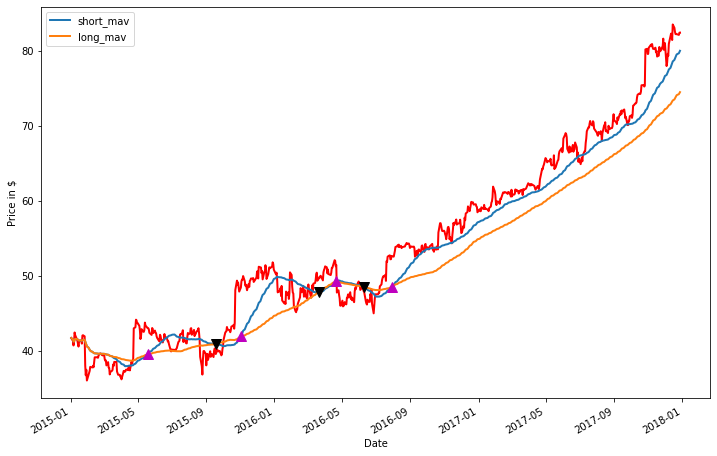

In [44]:
generate_smac_plot(stock="EOD/MSFT", from_dt="2015-01-01", to_dt="2018-01-01", short_lb=50, long_lb=120)